In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
import seaborn as sns # type: ignore


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

In [2]:
df = pd.read_csv(r'C:\Users\hp\Saclay-ai\ML\train_data.csv')
df.describe()

,packet_duration,length,target
count,11663.000000,11663.000000,11663.000000
mean,0.076039,78.192232,0.364400
std,0.194145,10.879049,0.481282
min,-0.998000,5.000000,0.000000
25%,0.001000,76.000000,0.000000
50%,0.005000,76.000000,0.000000
75%,0.009000,76.000000,1.000000
max,3.325000,102.000000,1.000000


In [3]:
X = df.drop(columns=["packet_id", "target"])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [4]:
# One-hot encode categorical features with handle_unknown='ignore'
D = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_new = D.fit_transform(X_train[["second_frame", "src_ip", "dest_ip", "protocol", "info"]])
X_test_new = D.transform(X_test[["second_frame", "src_ip", "dest_ip", "protocol", "info"]])

# Concatenate with numerical features
X_train_final = np.concatenate([X_train_new, X_train[['packet_duration', 'length']].values], axis=1)
X_test_final = np.concatenate([X_test_new, X_test[['packet_duration', 'length']].values], axis=1)

# Feature names
final_feature_names = list(D.get_feature_names_out(["second_frame", "src_ip", "dest_ip", "protocol", "info"])) + ['packet_duration', 'length']
X_train_final_df = pd.DataFrame(X_train_final, columns=final_feature_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=final_feature_names)

# Standardize numerical features
scaler = StandardScaler()
num_indices = [X_train_final_df.columns.get_loc(col) for col in ['packet_duration', 'length']]
X_train_final[:, num_indices] = scaler.fit_transform(X_train_final[:, num_indices])
X_test_final[:, num_indices] = scaler.transform(X_test_final[:, num_indices])

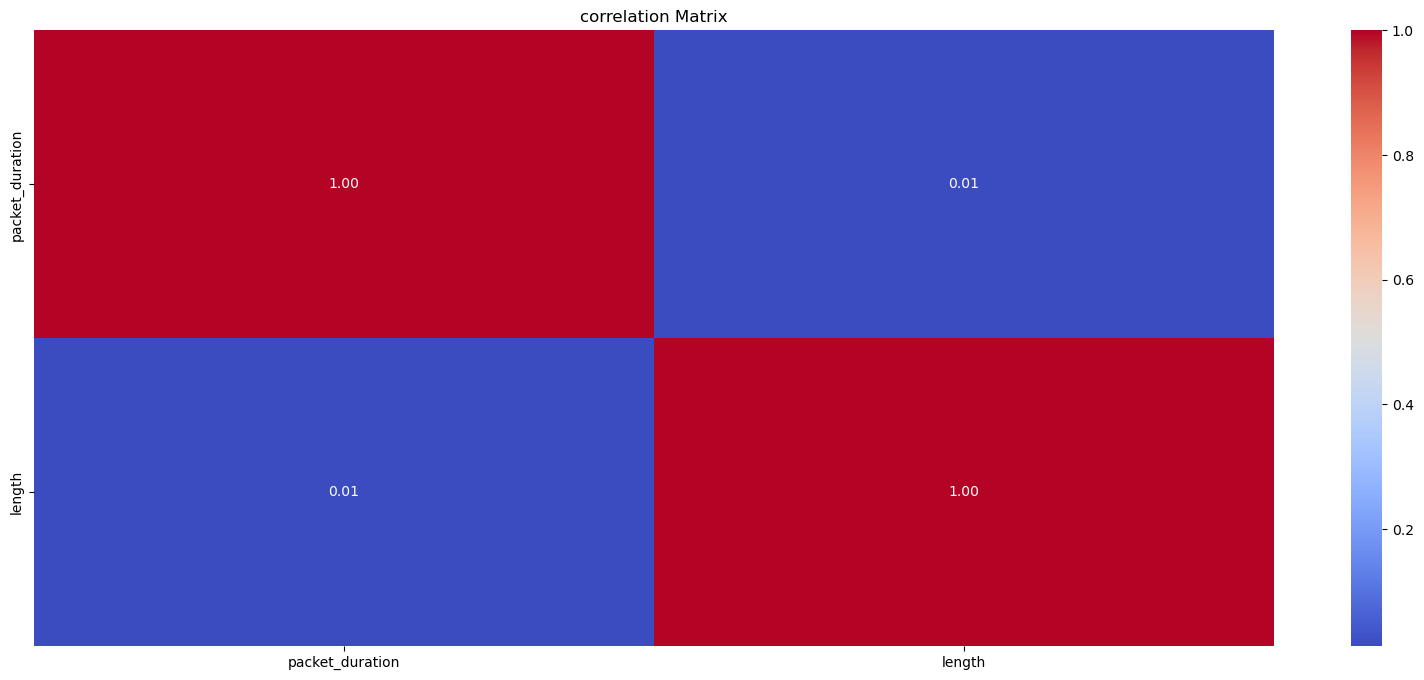

In [5]:
plt.figure(figsize=(20, 8))
corr_matrix = X_train_final_df[['packet_duration', 'length']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation Matrix")
plt.show()

## 1.Logitic Regression

In [6]:
log_reg = LogisticRegression(random_state=42)
log_reg_result = evaluate_model(log_reg, X_train_final, X_test_final, y_train, y_test)
print("Logistic Regression:", log_reg_result)

Logistic Regression: {'Accuracy': 0.951993141877411, 'Precision': 0.9657360406091371, 'Recall': 0.8995271867612293, 'F1-Score': 0.9314565483476133}


## 2.Perceptron

In [7]:
percpt = Perceptron(random_state=42)
percpt_result = evaluate_model(percpt, X_train_final, X_test_final, y_train, y_test)
print("Perceptron:", percpt_result)

Perceptron: {'Accuracy': 0.9807115302186027, 'Precision': 0.9739644970414201, 'Recall': 0.9728132387706856, 'F1-Score': 0.9733885274985216}


## 3.GDA

In [8]:
gda = QuadraticDiscriminantAnalysis()
gda_result = evaluate_model(gda, X_train_final, X_test_final, y_train, y_test)
print("GDA:", gda_result)

GDA: {'Accuracy': 0.9888555507929704, 'Precision': 1.0, 'Recall': 0.9692671394799054, 'F1-Score': 0.9843937575030012}


## 4.Naive Bayes

In [9]:
nb = GaussianNB()
nb_result = evaluate_model(nb, X_train_final, X_test_final, y_train, y_test)
print("Naive Bayes:", nb_result)

Naive Bayes: {'Accuracy': 0.9991427346763824, 'Precision': 0.9976415094339622, 'Recall': 1.0, 'F1-Score': 0.9988193624557261}


## 5.SVM(linear kernel'i.e no kernel')

In [10]:
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear_result  = evaluate_model(svm_linear, X_train_final, X_test_final, y_train, y_test)
print("SVM (linear):", svm_linear_result)

SVM (linear): {'Accuracy': 0.9901414487783969, 'Precision': 0.9987878787878788, 'Recall': 0.9739952718676123, 'F1-Score': 0.9862357869539198}


## 6.SVM(polynomial kernel)

In [11]:
svm_poly = SVC(kernel='linear', C=1, random_state=42)
svm_poly_result  = evaluate_model(svm_poly, X_train_final, X_test_final, y_train, y_test)
print("SVM (poly):", svm_poly_result)

SVM (poly): {'Accuracy': 0.9901414487783969, 'Precision': 0.9987878787878788, 'Recall': 0.9739952718676123, 'F1-Score': 0.9862357869539198}


## 7.SVM(Gaussian kernel)

In [12]:
svm_rbf = SVC(kernel='linear', C=1, random_state=42)
svm_rbf_result  = evaluate_model(svm_rbf, X_train_final, X_test_final, y_train, y_test)
print("SVM (RBF):", svm_rbf_result)

SVM (RBF): {'Accuracy': 0.9901414487783969, 'Precision': 0.9987878787878788, 'Recall': 0.9739952718676123, 'F1-Score': 0.9862357869539198}


In [17]:
results = pd.DataFrame({
    'Logistic Regression': log_reg_result,
    'Perceptron': percpt_result,
    'GDA (QDA)': gda_result,
    'Naïve Bayes': nb_result,
    'SVM (Linear)': svm_linear_result,
    'SVM (Polynomial)': svm_poly_result,
    'SVM (RBF)': svm_rbf_result
}).T
print("\nModel Comparison:\n", results)


Model Comparison:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.951993   0.965736  0.899527  0.931457
Perceptron           0.980712   0.973964  0.972813  0.973389
GDA (QDA)            0.988856   1.000000  0.969267  0.984394
Naïve Bayes          0.999143   0.997642  1.000000  0.998819
SVM (Linear)         0.990141   0.998788  0.973995  0.986236
SVM (Polynomial)     0.990141   0.998788  0.973995  0.986236
SVM (RBF)            0.990141   0.998788  0.973995  0.986236
